In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

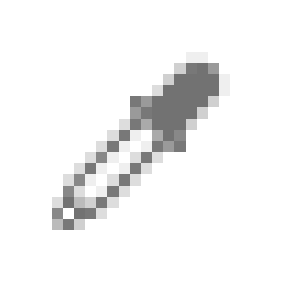

In [2]:
im = plt.imread("ppt_spoid.png")

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(im)
ax.axis(False)
ax.set_facecolor("none")
fig.savefig("./ppt_spoid_big.png")

In [3]:
import numpy as np
from matplotlib import colors

# 파워포인트에서 읽은 값
c_ppt = [25, 160, 170]

# [0, 1] array로 변경
c_array = np.array(c_ppt)/255
print(f"# c_array= {c_array}")

# hex code로 변경
c_hex = colors.to_hex(np.array([25, 160, 170])/255)
print(f"# c_hex= ''{c_hex}'")

# c_array= [0.09803922 0.62745098 0.66666667]
# c_hex= ''#19a0aa'


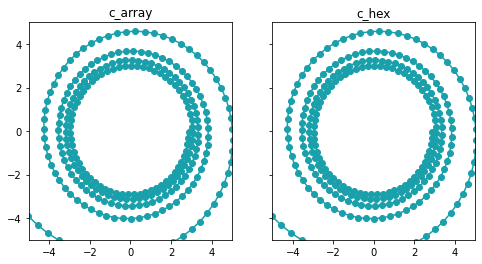

In [4]:
import matplotlib.pyplot as plt

t = np.arange(0.1, 10*np.pi, 0.1)

r = 10/np.log1p(t)
X = r * np.cos(t)
Y = r * np.sin(t)

fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True)
axs[0].plot(X, Y, "o-", c=[0.09803922, 0.62745098, 0.66666667])
axs[0].set_title("c_array")
axs[1].plot(X, Y, "o-", c="#19a0aa")
axs[1].set_title("c_hex")
axs[0].set_xlim(-5, 5)
axs[0].set_ylim(-5, 5)


fig.savefig("./55_colors_07.png")

# c_array (old)= [0.09803922 0.62745098 0.66666667]
# c_hsv (old)= [0.51149425 0.85294118 0.66666667]
# c_hsv (new)= [0.61149425 0.35294118 0.86666667]
# c_array (new)= [0.56078431 0.66204192 0.86666667]


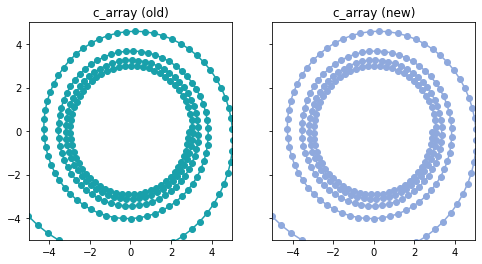

In [5]:
# 입력 색상 (RGB)
print(f"# c_array (old)= {c_array}")

# 입력 색상 (HSV)
c_hsv = colors.rgb_to_hsv(c_array)
print(f"# c_hsv (old)= {c_hsv}")

# 출력 색상 (HSV)
c_hsv_new = c_hsv + np.array([0.1, -0.5, 0.2])
print(f"# c_hsv (new)= {c_hsv_new}")

# 출력 색상 (RGB)
c_array_new = colors.hsv_to_rgb(c_hsv_new)
print(f"# c_array (new)= {c_array_new}")

fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True)
axs[0].plot(X, Y, "o-", c=c_array)
axs[0].set_title("c_array (old)")
axs[1].plot(X, Y, "o-", c=c_array_new)
axs[1].set_title("c_array (new)")
axs[0].set_xlim(-5, 5)
axs[0].set_ylim(-5, 5)


fig.savefig("./55_colors_08.png")

In [9]:
def mod_hue(rgb, d_hue):
    """
    rgb   : (np.array, list or hex code) RGB color
    d_hue : (float) Hue change of the rgb
    """
    if isinstance(rgb, str):
        rgb = colors.to_rgb(rgb)
    if isinstance(d_hue, str):
        d_hue = colors.to_rgb(d_due)
        
    hsv = colors.rgb_to_hsv(rgb)
    hsv += np.array([d_hue, 0, 0])
    hsv[0] = hsv[0]%1

    return colors.hsv_to_rgb(hsv)

def mod_sat(rgb, d_sat):
    """
    rgb   : (np.array, list or hex code) RGB color
    d_sat : (float) saturation change of the rgb
    """
    if isinstance(rgb, str):
        rgb = colors.to_rgb(rgb)
    if isinstance(d_sat, str):
        d_sat = colors.to_rgb(d_sat)
        
    hsv = colors.rgb_to_hsv(rgb)
    hsv += np.array([0, d_sat, 0])
    if hsv[1] > 1:
        hsv[1] = 1
    elif hsv[1] < 0:
        hsv[1] = 0
        
    return colors.hsv_to_rgb(hsv)

def mod_val(rgb, d_val):
    """
    rgb   : (np.array, list or hex code) RGB color
    d_sat : (float) value change of the rgb
    """
    if isinstance(rgb, str):
        rgb = colors.to_rgb(rgb)
    if isinstance(d_val, str):
        d_val = colors.to_rgb(d_val)
    
    hsv = colors.rgb_to_hsv(rgb)
    hsv += np.array([0, 0, d_val])
    if hsv[2] > 1:
        hsv[2] = 1
    elif hsv[2] < 0:
        hsv[2] = 0
    return colors.hsv_to_rgb(hsv)


def mod_color(rgb, d_hsv):
    """
    rgb   : (np.array, list or hex code) RGB color
    d_hsv : (np.array or list) value change in hsv space
    """
    if isinstance(rgb, str):
        rgb = colors.to_rgb(rgb)
    if isinstance(d_hsv, str):
        d_hhsv = colors.to_rgb(d_hsv)
    
    hsv = colors.rgb_to_hsv(rgb)
    d_hue, d_sat, d_val = d_hsv
    
    hsv += np.array([d_hue, d_sat, d_val])
    
    # hue circulation
    hsv[0] = hsv[0]%1
    
    # saturation limited in [0, 1]
    if hsv[1] > 1:
        hsv[1] = 1
    elif hsv[1] < 0:
        hsv[1] = 0
    
    # value limited in [0, 1]
    if hsv[2] > 1:
        hsv[2] = 1
    elif hsv[2] < 0:
        hsv[2] = 0
        
    return colors.hsv_to_rgb(hsv)

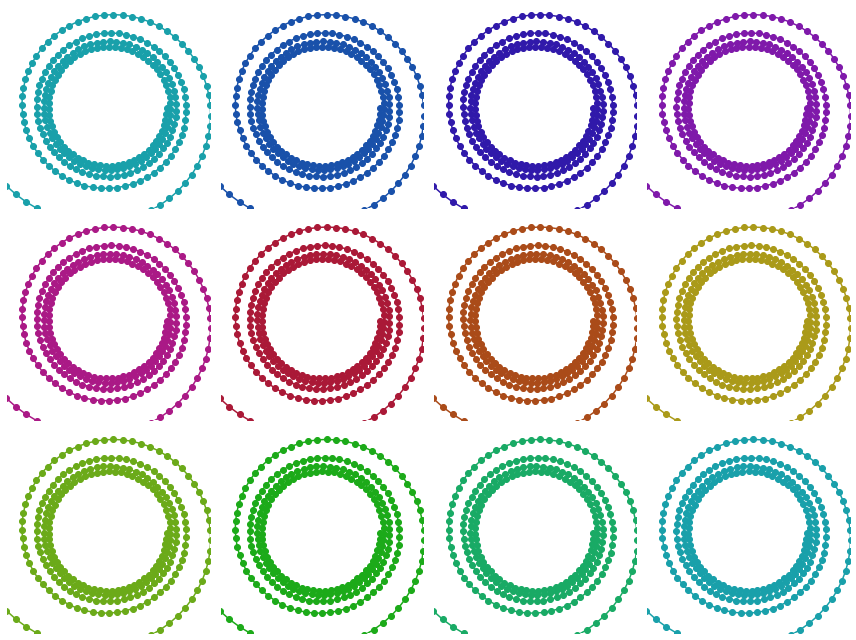

In [7]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(12, 9))
axs = axes.ravel()

for ax, dh in zip(axs, np.linspace(0, 1, 12)):
    c = mod_hue(c_array, dh)
    ax.plot(X, Y, "o-", c=c)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.axis(False)

fig.tight_layout()
fig.savefig("./55_colors_09.png")

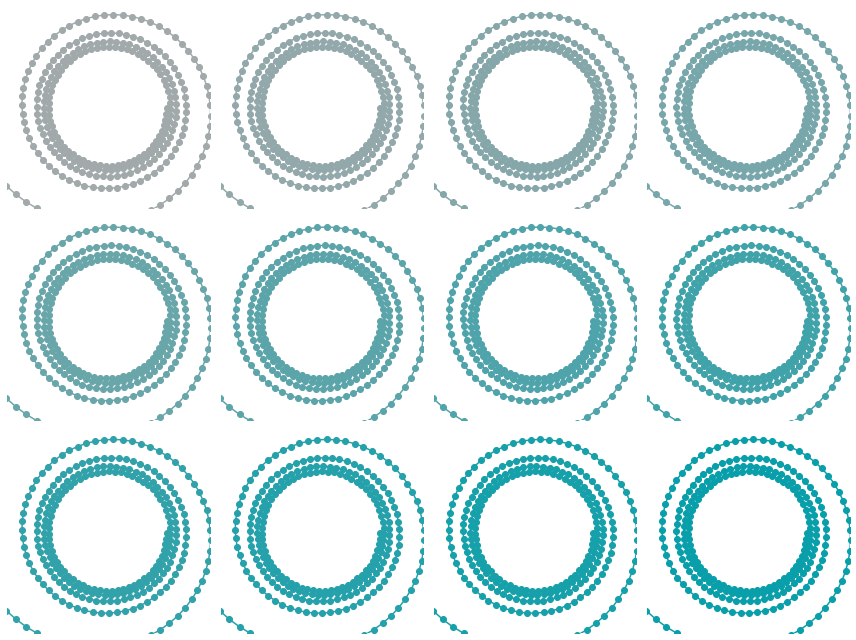

In [11]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(12, 9))
axs = axes.ravel()

for ax, ds in zip(axs, np.linspace(-0.8, 0.1, 12)):
    c = mod_sat(c_array, ds)
    ax.plot(X, Y, "o-", c=c)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.axis(False)

fig.tight_layout()
fig.savefig("./55_colors_10.png")

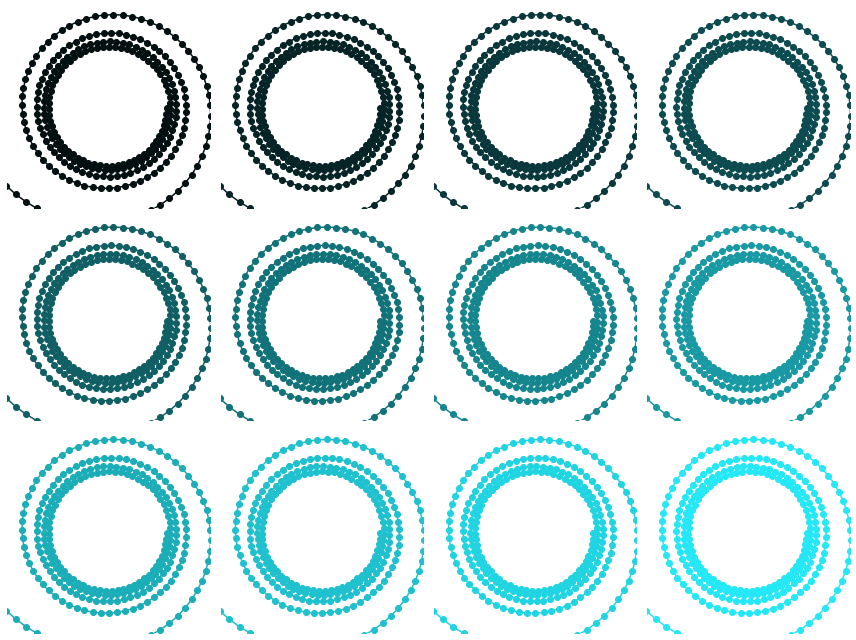

In [12]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(12, 9))
axs = axes.ravel()

for ax, dv in zip(axs, np.linspace(-0.6, 0.3, 12)):
    c = mod_val(c_array, dv)
    ax.plot(X, Y, "o-", c=c)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.axis(False)

fig.tight_layout()
fig.savefig("./55_colors_11.png")

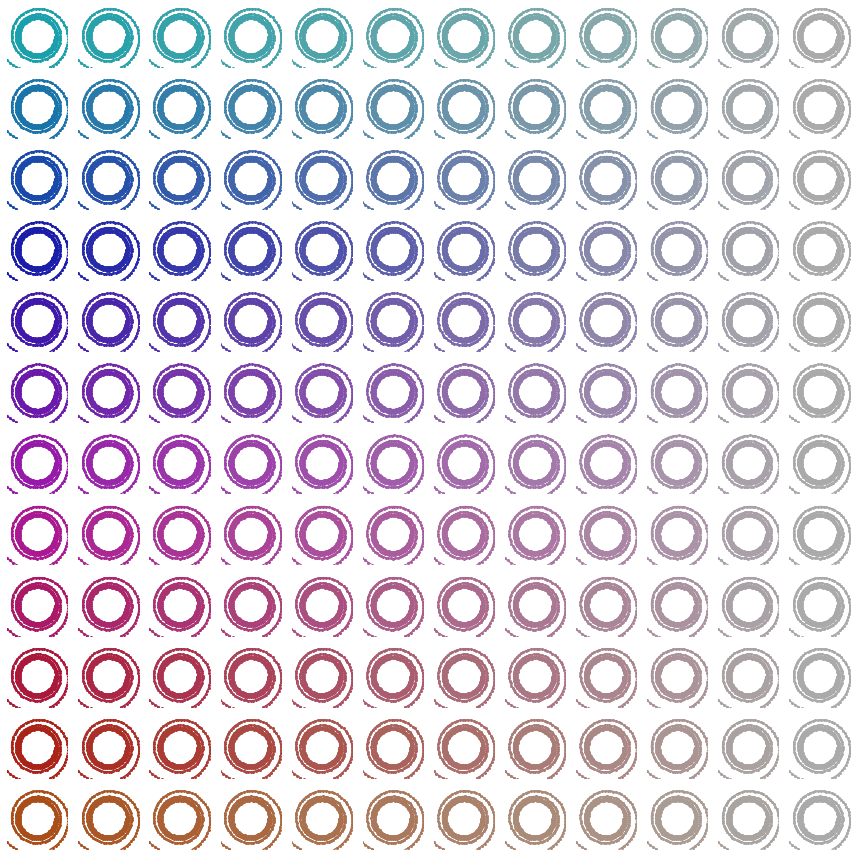

In [21]:
fig, axes = plt.subplots(ncols=12, nrows=12, figsize=(12, 12))

for i in range(len(axes)):
    for j in range(len(axes[i])):
        c = mod_color(c_array, np.array([i*0.05, j*-0.08, 0]))
        axes[i,j].plot(X, Y, "o-", c=c, ms=2)
        axes[i,j].set_xlim(-5, 5)
        axes[i,j].set_ylim(-5, 5)
        axes[i,j].axis(False)

fig.tight_layout()
fig.savefig("./55_colors_12.png")